## Training Error and Generalization Error

Training Error: error of model as calculated on the training data set.

Generalization Error: error of applying it ito an infinite stream of additional data points drawn from the same underlying data distribution.

We can never calculate the generalization error exactly. Estimate it by using an independent test set.

## Statistical Learning Theory

Since generalization is the fundamental problem in machine learning, you might not be surprised to learn that many mathematicians and theorists have dedicated their lives to developing formal theories to describe this phenomenon. In their eponymous theorem, Glivenko and Cantelli derived the rate at which the training error converges to the generalization error. In a series of seminal papers, Vapnik and Chervonenkis extended this theory to more general classes of functions. This work laid the foundations of Statistical Learning Theory.


## Model Complexity

Factors that tend to influence the generalizability of a model:

1. The number of tunable parameters. "degree of freedom". When it is large, models tend to be more susceptible to overfitting

2. The values taken by the parameters. Wider range, more susceptible to overfitting

3. The number of training examples. Easy to overfit a small dataset.

## Model Selection

Select final model after evaluating several candidate models.

In order to determine the best among our candidate models, we will typically employ a validation set.


## Validation Data Set

If we overfit the test data. How would we ever know. 

Never rely on the test data for model selection. We cannot rely solely on the training data for model selection either, because we cannot estimate the generalization error on the very data that we use to train the model.

The comman practice: split our data three ways, valiadtion dset, training set and test set.

## K-fold Cross-Validation

Training data scarce:

1. the original training data is split into K non-overlapping subsets.
2. model training and validation are executed K times, each time training on K - 1 subsets and validating on a different subset ( the one not used for training in that round)
3. average over the results from K experiments






## Polynomial Regression

Explore overfitting and underfitting

In [1]:
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.append("..") 
import d2l_pytorch as d2l

### Generate Data Set

In [21]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5

features = torch.randn((n_train + n_test, 1))

poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1) 

labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1] + true_w[2] * poly_features[:, 2] + true_b)

labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

In [22]:
features[:2], poly_features[:2], labels[:2]

(tensor([[-0.9255],
         [ 0.7060]]), tensor([[-0.9255,  0.8566, -0.7928],
         [ 0.7060,  0.4984,  0.3519]]), tensor([-3.4722,  6.1206]))

### Defining, Training and Testing Model

In [23]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [24]:
num_epochs, loss = 100, torch.nn.MSELoss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    
    batch_size = min(10, train_labels.shape[0])    
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data,
          '\nbias:', net.bias.data)


final epoch: train loss 0.00010672420467017218 test loss 0.00010985617700498551
weight: tensor([[ 1.1975, -3.3991,  5.6009]]) 
bias: tensor([4.9977])


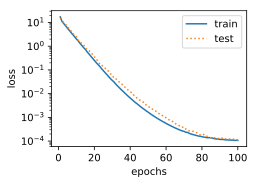

In [25]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], 
            labels[:n_train], labels[n_train:])

### Underfitting

final epoch: train loss 107.40306854248047 test loss 99.17977142333984
weight: tensor([[15.1507]]) 
bias: tensor([2.0093])


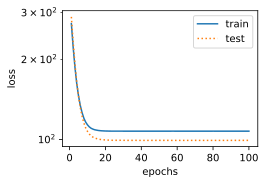

In [26]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train], labels[n_train:])

### Overfitting

final epoch: train loss 0.8729960918426514 test loss 57.50131607055664
weight: tensor([[3.1210, 0.5182, 2.6121]]) 
bias: tensor([1.4997])


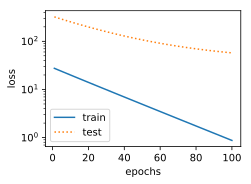

In [27]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2], labels[n_train:])